<a href="https://colab.research.google.com/github/AmirGhnbr/Food-Vision/blob/dev_branch/Food_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Lets first download the data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-09-24 12:46:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.128, 74.125.200.128, 74.125.130.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   148MB/s    in 3.4s    

2022-09-24 12:46:14 (148 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
import os 

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.

In [3]:
train_dir = "10_food_classes_all_data/train"
test_dir = "10_food_classes_all_data/test"

In [4]:
# get class names

import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_img = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  # return img

Image shape: (512, 512, 3)


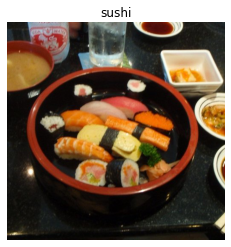

In [6]:
view_random_image(target_dir="10_food_classes_all_data/train/",
                        target_class=random.choice(class_names))

## Process the data

In [7]:
# Load data using keras utilities
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                                       seed=42,
                                                       image_size=(224,224),
                                                       batch_size=32)


Found 7500 files belonging to 10 classes.


In [8]:
test_ds = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                       seed=42,
                                                       image_size=(224,224),
                                                       batch_size=32)

Found 2500 files belonging to 10 classes.


## Build basic keras model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model1 = Sequential([
    tf.keras.layers.Rescaling(1/255., input_shape = (224,224,3)),
    Conv2D(16,3,activation="relu"),
    MaxPool2D(),
    Conv2D(32,3, activation="relu"),
    MaxPool2D(),
    Conv2D(64, 3 , activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation= "softmax")
])

In [10]:
## Compile the model
model1.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

In [11]:
history_1 = model1.fit(train_ds, epochs=10,
                       steps_per_epoch=len(train_ds),
                       validation_data=test_ds,
                       validation_steps=len(test_ds))

Epoch 1/10
235/235 [==============================] - 35s 91ms/step - loss: 2.0754 - accuracy: 0.2505 - val_loss: 1.8648 - val_accuracy: 0.3272
Epoch 2/10
235/235 [==============================] - 20s 85ms/step - loss: 1.8003 - accuracy: 0.3715 - val_loss: 1.8494 - val_accuracy: 0.3568
Epoch 3/10
235/235 [==============================] - 29s 122ms/step - loss: 1.4909 - accuracy: 0.4983 - val_loss: 1.8177 - val_accuracy: 0.3932
Epoch 4/10
235/235 [==============================] - 20s 82ms/step - loss: 1.0579 - accuracy: 0.6471 - val_loss: 2.2656 - val_accuracy: 0.3692
Epoch 5/10
235/235 [==============================] - 21s 88ms/step - loss: 0.5798 - accuracy: 0.8091 - val_loss: 2.6447 - val_accuracy: 0.3828
Epoch 6/10
235/235 [==============================] - 19s 78ms/step - loss: 0.2725 - accuracy: 0.9116 - val_loss: 3.2117 - val_accuracy: 0.3888
Epoch 7/10
235/235 [==============================] - 22s 91ms/step - loss: 0.1437 - accuracy: 0.9567 - val_loss: 4.0593 - val_accuracy

In [22]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        1

In [12]:
model1.evaluate(test_ds)

79/79 [==============================] - 4s 52ms/step - loss: 4.9921 - accuracy: 0.3468


[4.992125988006592, 0.3467999994754791]

In [13]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

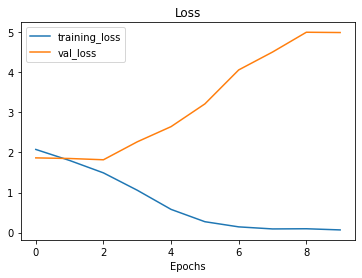

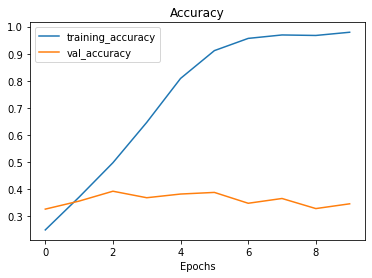

In [14]:
plot_loss_curves(history_1)

#### Validation loss is increasing means that models is overfitting the data

In [17]:
## Using data augmentation
data_augmentation_layer = Sequential([
    tf.keras.layers.RandomFlip("horizontal",input_shape=(224,224,3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

In [27]:
## Build model_2
model_2 = Sequential([
    data_augmentation_layer,
    tf.keras.layers.Rescaling(1./255),
    Conv2D(16, 3, padding="same", activation="relu", kernel_regularizer = tf.keras.regularizers.L2(0.2)),
    MaxPool2D(),
    Conv2D(32, 3, padding="same", activation="relu", kernel_regularizer = tf.keras.regularizers.L2(0.2)),
    MaxPool2D(),
    Conv2D(64, 3, padding="same", activation="relu", kernel_regularizer = tf.keras.regularizers.L2(0.2)),
    MaxPool2D(),
    tf.keras.layers.Dropout(0.2),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation= "softmax", name="output")
])

In [28]:
# Compile the model
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer = tf.keras.optimizers.Adam(0.0004),
                metrics = ["accuracy"])

In [29]:
history_2 = model_2.fit(train_ds, epochs = 15,
                        steps_per_epoch= len(train_ds),
                        validation_data = test_ds,
                        validation_steps = len(test_ds))

Epoch 1/15
235/235 [==============================] - 20s 81ms/step - loss: 6.7319 - accuracy: 0.1800 - val_loss: 2.9735 - val_accuracy: 0.2240
Epoch 2/15
235/235 [==============================] - 19s 80ms/step - loss: 2.5120 - accuracy: 0.2432 - val_loss: 2.2681 - val_accuracy: 0.2604
Epoch 3/15
235/235 [==============================] - 19s 81ms/step - loss: 2.2117 - accuracy: 0.2687 - val_loss: 2.1531 - val_accuracy: 0.2620
Epoch 4/15
235/235 [==============================] - 19s 80ms/step - loss: 2.1372 - accuracy: 0.2759 - val_loss: 2.0800 - val_accuracy: 0.2904
Epoch 5/15
235/235 [==============================] - 19s 80ms/step - loss: 2.0951 - accuracy: 0.2909 - val_loss: 2.0447 - val_accuracy: 0.2988
Epoch 6/15
235/235 [==============================] - 19s 81ms/step - loss: 2.0659 - accuracy: 0.2944 - val_loss: 2.0319 - val_accuracy: 0.3016
Epoch 7/15
235/235 [==============================] - 19s 80ms/step - loss: 2.0425 - accuracy: 0.2993 - val_loss: 2.0285 - val_accuracy:

In [23]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                  

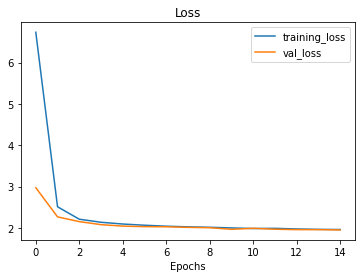

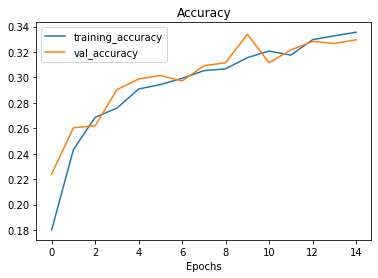

In [30]:
plot_loss_curves(history_2)

In [31]:
model_2.evaluate(test_ds)

79/79 [==============================] - 5s 55ms/step - loss: 1.9526 - accuracy: 0.3296


[1.9525911808013916, 0.3296000063419342]

## Try another cnn architecture